<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Estudiante 1:Luis Carlos Alvarado y Estudiante 2:Julio Olaf González

**Fecha:** 6 de octubre del 2020.

**Expediente** : if721264 e 
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase9_GenDistribucionProbabilidad y Clase10_MetodoAceptacionRechazo


>### <font color ='red'> **Tarea 4** 
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $f(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

# SOLUCIÓN ESTUDIANTE 1

### Problema 1

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def comparar_aleatorios_densidad(f,Finv,N):
    u = np.random.uniform(.1,.9,N)
    f_rand = Finv(u)
    x=np.arange(0,1,.01)
    f_densidad = f(x)
    plt.hist(f_rand,density=True, bins=60)
    plt.plot(x,f_densidad)
    plt.show()

C:\Users\julio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


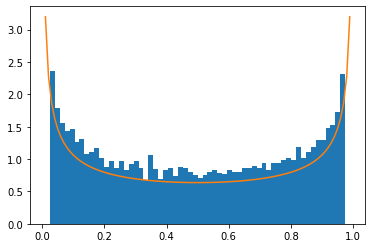

In [47]:
f= lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)
Finv= lambda u: (np.sin((np.pi*u)/2))**2
comparar_aleatorios_densidad(f,Finv,10000)

### Problema 2

In [48]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

In [49]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()

In [50]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

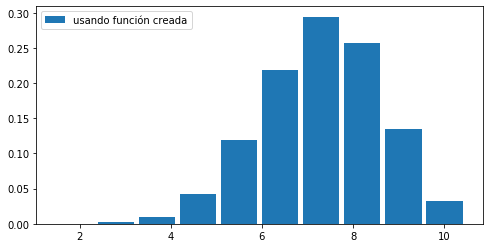

In [51]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**4

p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

# SOLUCIÓN ESTUDIANTE 2

### Problema 1

In [52]:
def comparar_aleatorios_densidad(f, Finv, N):
    
    U=np.random.uniform(0, 1, N)
    frand=Finv(U)
    
    x=np.arange(0,1,0.01)
    fdensidad=f(x)
    
    plt.hist(frand, density=True, bins=40)
    plt.plot(x, fdensidad)
    plt.show()
    

C:\Users\julio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


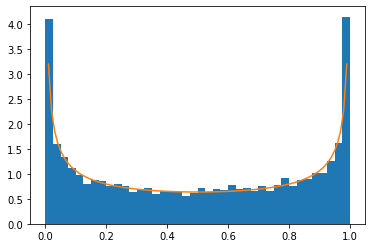

In [53]:
f = lambda x: 1/((np.sqrt(1-x))*np.sqrt(x)*np.pi)
Finv = lambda u: (np.sin(u*np.pi/2))**2
N=10000
comparar_aleatorios_densidad(f,Finv,N)

### Problema 2

In [54]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(len(U)))))
    return v

In [55]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()

In [85]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

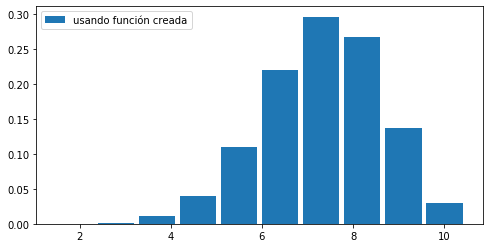

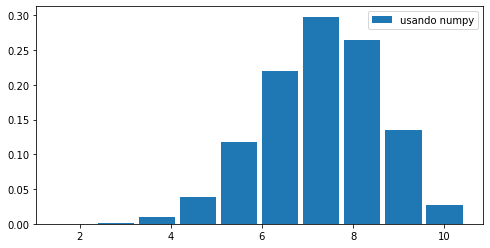

In [57]:
n = 10
p = 0.7
N = 10**4
p_acum = P_acum_Binomial_o(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')

# Usando numpy
d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'usando numpy')

### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

# SOLUCIÓN ESTUDIANTE 1

# SOLUCIÓN ESTUDIANTE 2

Las ventajas que la función sea recursinva es que no es necesario definir la secuencia de pasos exactos para resolver el problema. La ecuación seria de menor tamaño. De esta manera se conoce la solución explicita, el cual equivaldria a resultado de la ecuación anterior. 

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

# SOLUCIÓN ESTUDIANTE 1

In [58]:
# Función que calcula la probabilidad acumulada optimizada
def Poisson (n,l):
    Pr = np.zeros(n)
    Pr[0] = np.exp(-l)
    def pr(k):
        nonlocal Pr
        Pr[k+1]=(l/(k+1))*Pr[k]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(k) for k in range(n-1)]
    return np.cumsum(Pr)

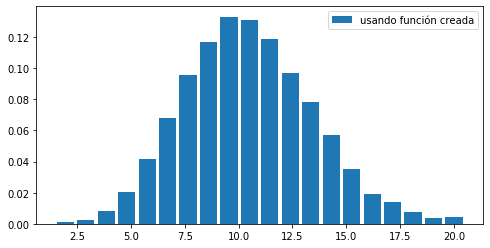

In [59]:
# def D_binomial_intermedia(n,p,N):
n = 20; l = 10; N = 10**4

p_acum = Poisson(n,l)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_Poisson = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_Poisson,'usando función creada')

# SOLUCIÓN ESTUDIANTE 2

In [60]:
# Función que calcula la probabilidad acumulada optimizada
def poisson(n,p):
    Pr = np.zeros(n)
    Pr[0] = np.exp(-p)
    def pr(i):
        nonlocal Pr
        Pr[i+1]=(p/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

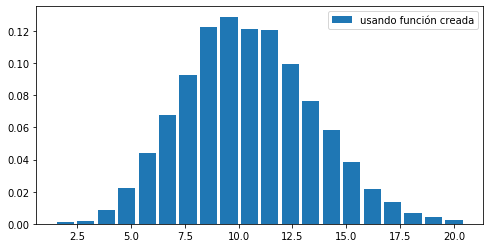

In [61]:
n=20
p=10
N=10**4
p_acum = poisson(n,p)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'usando función creada')


# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
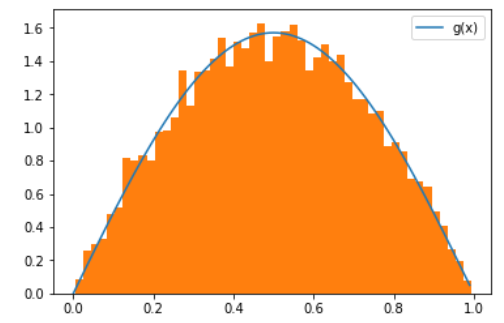

# SOLUCIÓN ESTUDIANTE 1

In [62]:
from scipy import optimize
from scipy.stats import beta

[1.875] [1.875]


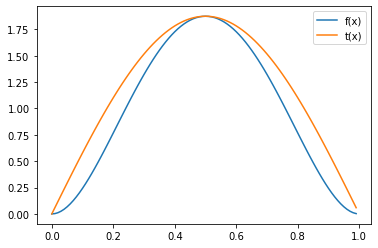

In [63]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(x*np.pi) # función constante
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print(max_f,max_t)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

In [64]:
def comparar_aleatorios_densidad(f,Finv,N):
    u = np.random.uniform(0,1,N)
    f_rand = Finv(u)
    x=np.arange(0,1,.01)
    g = f(x)
    plt.hist(f_rand,density=True, bins=40)
    plt.plot(x,g)
    plt.show()

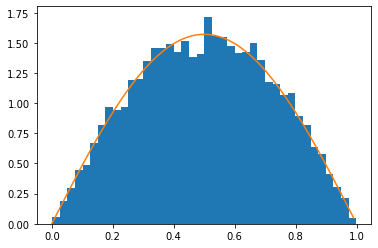

In [65]:
g= lambda x: (np.pi/2)*np.sin(np.pi*x)
Ginv= lambda u:(1/np.pi)*np.arccos(-2*u+1)
N=10000

comparar_aleatorios_densidad(g,Ginv,N)

# SOLUCIÓN ESTUDIANTE 2

El máximo de f es: [1.875]


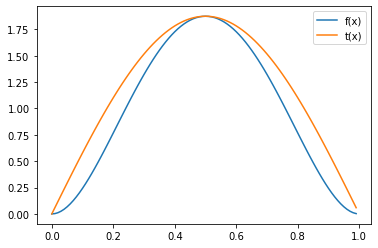

In [66]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(x*np.pi) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

$$c=\int_{0}^{1}a \sin(\pi x)= 1.193662073189215$$

$$g(x)=t(x)/c \rightarrow g(x)$$

$$t(x)=a \sin(\pi x)$$

$$g(x)=\frac{a \sin(\pi x)}{\frac{2}{\pi}a}$$

$$g(x)=\frac{ \sin(\pi x)}{\frac{2}{\pi}}$$

$$g(x)=\frac{ 2\sin(\pi x)}{\pi}$$

$$G(x)=\int_{0}^{x}\frac{ 2\sin(\pi x)}{\pi} =-2\cos(\pi x)$$

$$-2\cos(\pi x)=U$$

$$U = \frac{1}{\pi}\arccos(-2u+1)$$

In [67]:
def comparar_aleatorios_densidad(f,Finv,N):
    u = np.random.uniform(0,1,N)
    f_rand = Finv(u)
    x=np.arange(0,1,.01)
    g = f(x)
    plt.hist(f_rand,density=True, bins=40)
    plt.plot(x,g)
    plt.show()

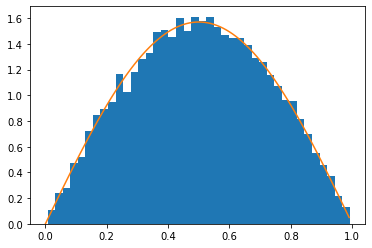

In [68]:
g = lambda x: (np.pi/2)*np.sin(np.pi*x)
G_inv=lambda u: (1/np.pi)*np.arccos(-2*u+1)
N=10000
comparar_aleatorios_densidad(g,G_inv,N)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
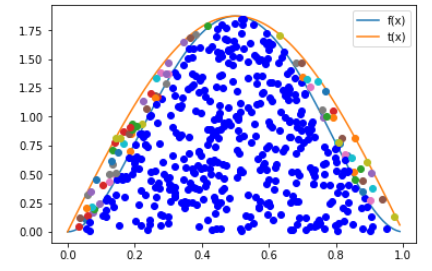

# SOLUCIÓN ESTUDIANTE 1

In [69]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

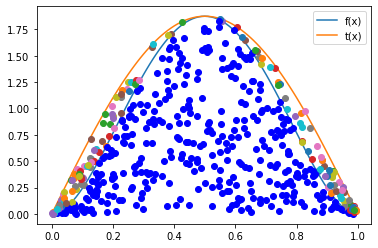

In [70]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función sinoidal
t = lambda x: max_f*np.sin(x*np.pi) # función sinoidal

max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular

R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

# SOLUCIÓN ESTUDIANTE 2

In [71]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <= f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]                
    plt.show()

El máximo de f es: [1.875]


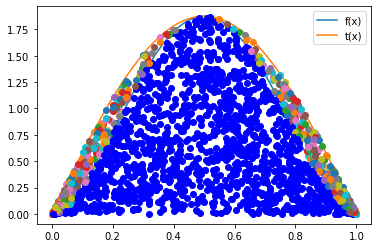

In [72]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.sin(x*np.pi) # función sinoidal
max_t = f(optimize.fmin(lambda x:-t(x),0,disp=False))

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 2000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# basados en el dominio de la función f(x), en este caso el dominio es [0,1],
# entonces yo debo de generar variables aleatorias uniformes entre U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)
# plt.show()

aleatorias = Acep_rechazo(R2,R1,f,t)
aleatorias



6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

# SOLUCIÓN ESTUDIANTE 1

In [73]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    cont = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal cont
        cont [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]

    return cont

In [74]:
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
tsin= lambda x: max_f*np.sin(x*np.pi) # función sinoidal
tcons= lambda x: max_f*np.ones(len(x)) # función constante 

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones


# Validación del método
N = 500
R2 = np.random.rand(N)
R1 = np.random.rand(N)

In [75]:
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante', sum(Acep_rechazo2(R2,R1,f,tcons))/500)
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal', sum(Acep_rechazo2(R2,R1,f,tsin))/500)

El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante 0.534
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal 0.722


# SOLUCIÓN ESTUDIANTE 2

In [81]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazos(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    su = np.zeros(len(R1))
    condition = R2*t_x <=f_x
    def a(i):
        nonlocal su
        su [i] = True if condition[i] else False 
    [a(i) for i in range(len(R1))]            
    return su

In [82]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t1 = lambda x: max_f*np.sin(x*np.pi) # función sinoidal
t2 = lambda x: max_f*np.ones(len(x)) # función constante
x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
N = 2000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)

In [83]:
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante', sum(Acep_rechazos(R2,R1,f,t2))/500)
print('El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal', sum(Acep_rechazos(R2,R1,f,t1))/500)

El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) constante 2.146
El porcentaje de puntos de aceptación cuando se usa 𝑡(𝑥) un pulso senoidal 2.836


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

# SOLUCIÓN ESTUDIANTE 1

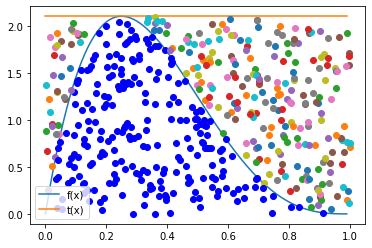

In [79]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante
# Función objetivo 
f = lambda x:20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) 

x = np.arange(0,1,0.01)  
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

# SOLUCIÓN ESTUDIANTE 2

El máximo de f es: [2.109375]


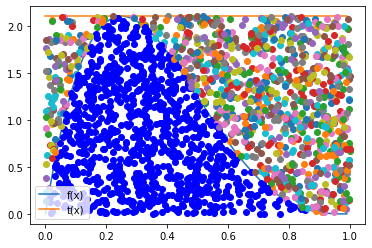

In [84]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:20*x*(1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
# Función t -> Función constante
t = lambda x: max_f*np.ones(len(x)) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 2000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# basados en el dominio de la función f(x), en este caso el dominio es [0,1],
# entonces yo debo de generar variables aleatorias uniformes entre U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)
# plt.show()
aleatorias = Acep_rechazo(R2,R1,f,t)
aleatorias